# Kernel method
## 1. Kernel function
### 1.1 Introduction & Properties
The idea of function $\phi(\mathbf{x})$ is to tranform the representation space of the input data, where data may be not linearly seperable, into a larger dimensional space where a linear classifier (Hard/soft Margin SVM, Logistic Regression or PLA...) can be used and get good performance. Linear discrimination in large space is equivalent to a non linear discrimination in the original space.  
   
The kernel function is given by:  
$$k(x,x') = \phi(\mathbf{x})^T\phi(\mathbf{x}')$$  
  
Properties:  
1. Symmetric function $k(x,x') =k(x',x)$  
2. Mercer Condition  
$$\sum_{n=1}^N \sum_{m=1}^m k(\mathbf{x}_m, \mathbf{x}_n) c_nc_m \geq 0, ~~ \forall c_i \in \mathbb{R}, i = 1, 2, \dots, N \quad \quad (1)$$  
  
Suppose $c_n = y_n \lambda_n$  
$$\lambda^T \mathbf{K} \lambda = \sum_{n=1}^N \sum_{m=1}^m k(\mathbf{x}_m, \mathbf{x}_n) y_ny_m \lambda_n \lambda_m \geq 0, ~\forall \lambda_n \quad\quad (2) $$  
where $\mathbf{K}$ is a symmetric Matrix with $k_{ij} = y_ny_m k(\mathbf{x}_n, \mathbf{x}_m)$ 
### 1.2 Constructing Kernel Functions 
A necessary and sufficient condition for a function $k(x, x')$ to be a valid kernel is that the Gram matrix $\mathbf{K}$, whose elements are given by $k(x_n, x_m)$, should be positive semidefinite for all possible choices of the set $\{x_n\}$  
   
Given valid kerneld $k_1(x,x')$ and $k_2(x,x')$, the following new kernels will also be valid:  
   
$$ 
\begin{eqnarray} k(x,x') &=& ck_1(x,x') \\ 
k(x,x') &=& f(x)k_1(x,x')f(x') \\ 
k(x,x') &=& q. k_1(x,x') \\ 
k(x,x') &=& exp \left( k_1(x,x') \right) \\ 
k(x,x') &=& k_1(x,x')+k_2(x,x') \\ 
k(x,x') &=& k_1(x,x')k_2(x,x') \\ 
k(x,x') &=& k_3 \big( \phi(x),\phi(x') \big) \\ 
k(x,x') &=& x^T\mathbf{A}x' \end{eqnarray}
$$
### 1.3 Some usual Kernel functions 
#### 1.3.1 Linear  
$$k(\mathbf{x}, \mathbf{z}) = \mathbf{x}^T\mathbf{z}$$
In sklearn.svm.SVC => kernel = 'linear' 
#### 1.3.2 Polynomial  
$$k(\mathbf{x}, \mathbf{z}) = (r + \gamma \mathbf{x}^T\mathbf{z})^d$$
   
sklearn.svm.SVC => kernel = 'poly' 
#### 1.3.3 Radial Basic Function (Rbf) or Gaussien kernel function
$$k(\mathbf{x}, \mathbf{z}) = \exp(-\gamma ||\mathbf{x} - \mathbf{z}||_2^2), ~~ \gamma > 0 $$

sklearn.svm.SVC => kernel = 'rbf'
#### 1.3.4 Sigmod   
$$k(\mathbf{x}, \mathbf{z}) = \text{tanh}(\gamma \mathbf{x}^T\mathbf{z} + r)$$
  
sklearn.svm.SVC => kernel = 'sigmoid'

## Examples

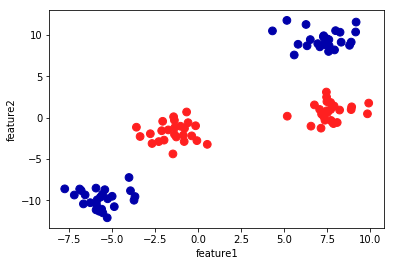

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
%matplotlib inline
import mglearn

X, y = make_blobs(centers=4, random_state=8)
y = y % 2
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
plt.xlabel("feature1")
plt.ylabel("feature2")


A linear model for classification can only separate points using a line, and will not be
able to do a very good job on this dataset:

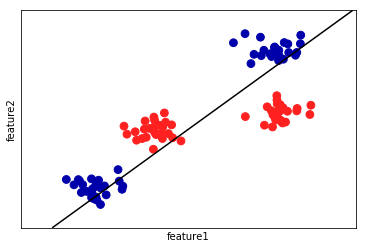

In [5]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
plt.xlabel("feature1")
plt.ylabel("feature2")

 let’s expand the set of input features, say by also adding feature2 ^ 2, the square of the second feature, as a new feature. Instead of representing each data point as a two-dimensional point (feature1, feature2), we now represent it as a threedimensional point (feature1, feature2, feature2 ^ 2)

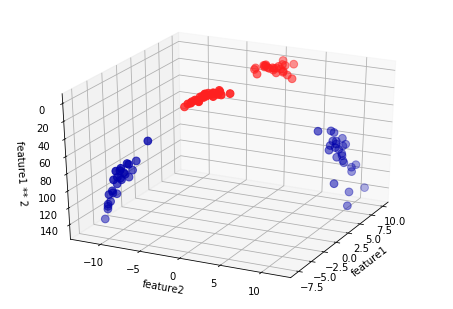

In [6]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature1 ** 2")

In the new, three-dimensional representation of the data, it is now indeed possible to separate the red and the blue points using a linear model, a plane in three dimensions.

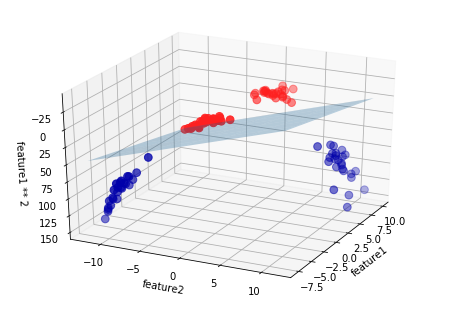

In [7]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min(), X_new[:, 0].max(), 50)
yy = np.linspace(X_new[:, 1].min(), X_new[:, 1].max(), 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap=mglearn.cm2, s=60)
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature1 ** 2")

As a function of the original features, the linear SVM model is not actually linear anymore. It is not a line, but more of an ellipse.

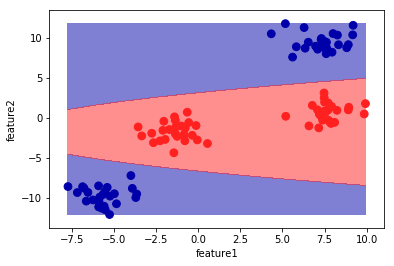

In [8]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
cmap=mglearn.cm2, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
plt.xlabel("feature1")
plt.ylabel("feature2")